In [44]:
import numpy as np #operasi vektor dan matriks
import os # sistem operasi
from matplotlib import pyplot as plt # menampilkan data secara 2D atau 3D
import cv2 #opencv
import random # acak
import pickle #Object Serialization

Ref 
- https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/
- https://towardsdatascience.com/all-the-steps-to-build-your-first-image-classifier-with-code-cf244b015799
- https://www.youtube.com/watch?v=j-3vuBynnOE

In [45]:
file_list = []
class_list = []

DATADIR = "dataset"

# All the categories you want your neural network to detect
CATEGORIES = ["kepala","tangan","kaki","mata"]

In [46]:
IMG_SIZE = 50 #ukuran gambar dataset

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

In [47]:
def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

In [48]:
X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
X[1]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [165],
        [165],
        [166]],

       [[255],
        [255],
        [255],
        ...,
        [161],
        [164],
        [165]],

       [[255],
        [255],
        [255],
        ...,
        [161],
        [162],
        [159]]], dtype=uint8)

In [49]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

In [50]:
# Opening the files about data
x = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

In [51]:
# normalizing data (a pixel goes from 0 to 255)
X = X.astype('float32') /255.0

In [52]:
# Building the model
model = Sequential()

#ex
#kernel_size 3x3 
#model.add(BatchNormalization())
#model.add(MaxPool2D(strides=(2,2)))


# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))  
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(13))
model.add(Activation("softmax"))


# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

#Adam(lr=1e-4)

In [61]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images

#history = model.fit(x_train, y_train, batch_size=32, epochs=40, verbose=1, validation_data=(x_test, y_test))

print(type(X), X)
print(type(y), y)

#model.fit_generator
history = model.fit(X, y, batch_size=32, epochs=150, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model-export/model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model-export/model.h5")
print("Saved model to disk")

model.save('model-export/CNN.model')

<class 'numpy.ndarray'> [[[[0.80784315]
   [0.8       ]
   [0.83137256]
   ...
   [0.8862745 ]
   [0.8745098 ]
   [0.85882354]]

  [[0.80784315]
   [0.8156863 ]
   [0.8392157 ]
   ...
   [0.8862745 ]
   [0.89411765]
   [0.8666667 ]]

  [[0.827451  ]
   [0.8156863 ]
   [0.8352941 ]
   ...
   [0.8980392 ]
   [0.89411765]
   [0.8745098 ]]

  ...

  [[0.48235294]
   [0.5176471 ]
   [0.5372549 ]
   ...
   [0.9098039 ]
   [0.9098039 ]
   [0.9019608 ]]

  [[0.49803922]
   [0.5176471 ]
   [0.5411765 ]
   ...
   [0.9137255 ]
   [0.9019608 ]
   [0.89411765]]

  [[0.49803922]
   [0.52156866]
   [0.5686275 ]
   ...
   [0.9098039 ]
   [0.8980392 ]
   [0.8901961 ]]]


 [[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[1.        ]

Epoch 32/150
36/36 [==============================] - 0s 5ms/sample - loss: 0.0272 - acc: 1.0000 - val_loss: 2.0170 - val_acc: 0.5000
Epoch 33/150
36/36 [==============================] - 0s 5ms/sample - loss: 0.0215 - acc: 1.0000 - val_loss: 1.6082 - val_acc: 0.5000
Epoch 34/150
36/36 [==============================] - 0s 6ms/sample - loss: 0.0151 - acc: 1.0000 - val_loss: 2.1566 - val_acc: 0.5000
Epoch 35/150
36/36 [==============================] - 0s 7ms/sample - loss: 0.0337 - acc: 0.9722 - val_loss: 0.2601 - val_acc: 1.0000
Epoch 36/150
36/36 [==============================] - 0s 5ms/sample - loss: 0.0163 - acc: 1.0000 - val_loss: 0.1518 - val_acc: 1.0000
Epoch 37/150
36/36 [==============================] - 0s 7ms/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 0.1771 - val_acc: 1.0000
Epoch 38/150
36/36 [==============================] - 0s 7ms/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 0.2607 - val_acc: 1.0000
Epoch 39/150
36/36 [==============================] - 0s 7ms/s

36/36 [==============================] - 0s 4ms/sample - loss: 5.9684e-05 - acc: 1.0000 - val_loss: 1.4821 - val_acc: 0.5000
Epoch 93/150
36/36 [==============================] - 0s 5ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 1.5418 - val_acc: 0.5000
Epoch 94/150
36/36 [==============================] - 0s 4ms/sample - loss: 1.0511e-04 - acc: 1.0000 - val_loss: 1.5992 - val_acc: 0.5000
Epoch 95/150
36/36 [==============================] - 0s 5ms/sample - loss: 3.2222e-04 - acc: 1.0000 - val_loss: 1.6599 - val_acc: 0.5000
Epoch 96/150
36/36 [==============================] - 0s 5ms/sample - loss: 7.5560e-05 - acc: 1.0000 - val_loss: 1.7162 - val_acc: 0.5000
Epoch 97/150
36/36 [==============================] - 0s 6ms/sample - loss: 7.6716e-05 - acc: 1.0000 - val_loss: 1.7705 - val_acc: 0.5000
Epoch 98/150
36/36 [==============================] - 0s 6ms/sample - loss: 1.1664e-04 - acc: 1.0000 - val_loss: 1.8196 - val_acc: 0.5000
Epoch 99/150
36/36 [==============================]

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


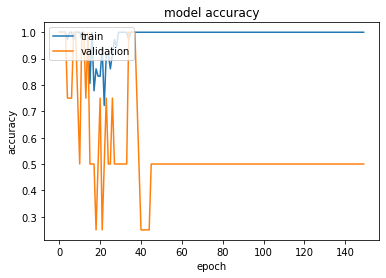

In [62]:
#Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [69]:
final_loss, final_acc = model.evaluate(X,y, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.1748, final accuracy: 0.9500


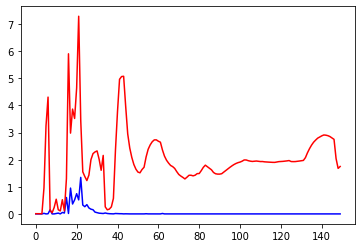

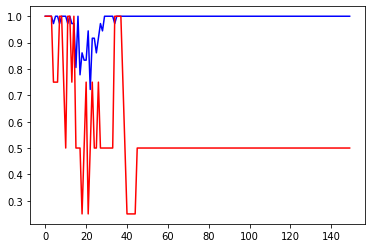

In [71]:
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.show()
plt.plot(history.history['acc'], color='b')
plt.plot(history.history['val_acc'], color='r')
plt.show()

In [72]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

NameError: name 'x_val' is not defined

In [67]:
import cv2
import tensorflow as tf
CATEGORIES = ["kepala","tangan","kaki","mata"]

def prepare(file):
    IMG_SIZE = 50
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("model-export/CNN.model")

prediction = model.predict(prepare("test.jpeg"))

print(prediction)
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
kaki
